# TD4 - Explainability AI

#### Matias OTTENSEN
#### Tiphaine KACHKACHI
#### Manon GARDIN

# Our dataset 

Petite description du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.datasets import load_diabetes

In [2]:
df = pd.read_csv('archive/US_Accidents_March23.csv', sep=',')

## Observe data

In [3]:
df.shape

(7728394, 46)

We have a great number of lines in our dataset.\
Also we have 46 columns, we probably won't need every one of them. Let's see their name :

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

As the dataframe is huge (almost 3 gb), we decided to work on another version of this dataframe, just to have a sample that we could work on esier:

Variables like Street, City, Zipcode and County won't be useful to keep, because there are too many distinct values.\
The columns Bump, Traffic_calming, Turning_loop, Give_Way, No_Exit, Roundabout can be deleted because they take only one value (all false).\
The variable Country only takes US so we can delete it.\
We can also delete some columns like Airport_Code that won't be relevant.

In [7]:
# Delete the columns we don't need 
df = df.drop(['Street', 'City', 'Description','County', 'Zipcode', 'Country', 'Bump', 'Traffic_Calming', 'Turning_Loop', 'Give_Way', 'No_Exit', 'Roundabout', 'Airport_Code'], axis=1)

In [8]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,False,True,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,False,True,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.describe

<bound method NDFrame.describe of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        

# Data Cleaning

Missing values:

In [10]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
State                          0
Timezone                    7808
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Crossing                       0
Junction                       0
Railway                        0
Station                        0
Stop                           0
Traffic_Signal                 0
Sunrise_Sunset             23246
Civil_Twil

There are missing values, so, what can we do about it?

First, we create a new dataframe to secure the first one if we ever delete the wring values

In [11]:
newdf = df

We had to make a choice for each column on how to handle the missing values. We chose to keep every missing values, we did not delete any rows. We preferred to replace them with values that are easily readable for string values, and to use the average for the numerical values.

In [12]:
#for the end lat/lng : we will fill the NAN by the start lat/lng:

newdf['End_Lat']=newdf['End_Lat'].fillna(newdf['Start_Lat'])
newdf['End_Lng']=newdf['End_Lng'].fillna(newdf['Start_Lng'])

#for the streets/Cities/Description/timezone/Weather_Condition/Sunrise_Sunset/Civil_Twilight/Nautical_Twilight
#and Astronomical_Twilight, we just write "unknown", 
#as we do not want to give fake informations to the person reading

newdf['Timezone']=newdf['Timezone'].fillna('unknown')
newdf['Weather_Condition']=newdf['Weather_Condition'].fillna('unknown')
newdf['Sunrise_Sunset']=newdf['Sunrise_Sunset'].fillna('unknown')
newdf['Civil_Twilight']=newdf['Civil_Twilight'].fillna('unknown')
newdf['Nautical_Twilight']=newdf['Weather_Condition'].fillna('unknown')
newdf['Astronomical_Twilight']=newdf['Astronomical_Twilight'].fillna('unknown')

# for the weather timestamp, we put now's date
newdf['Weather_Timestamp']=newdf['Weather_Timestamp'].fillna(datetime.now())

newdf = newdf.dropna(subset=['Precipitation(in)'])
newdf = newdf.dropna(subset=['Temperature(F)'])
newdf = newdf.dropna(subset=['Wind_Chill(F)'])
newdf = newdf.dropna(subset=['Pressure(in)'])
newdf = newdf.dropna(subset=['Humidity(%)'])
newdf = newdf.dropna(subset=['Visibility(mi)'])
newdf = newdf.dropna(subset=['Wind_Speed(mph)'])

# for the airport code, we write '###' in the missing values
newdf['Wind_Direction']=newdf['Wind_Direction'].fillna('###')

In [13]:
print(newdf.isnull().sum())

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
State                    0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


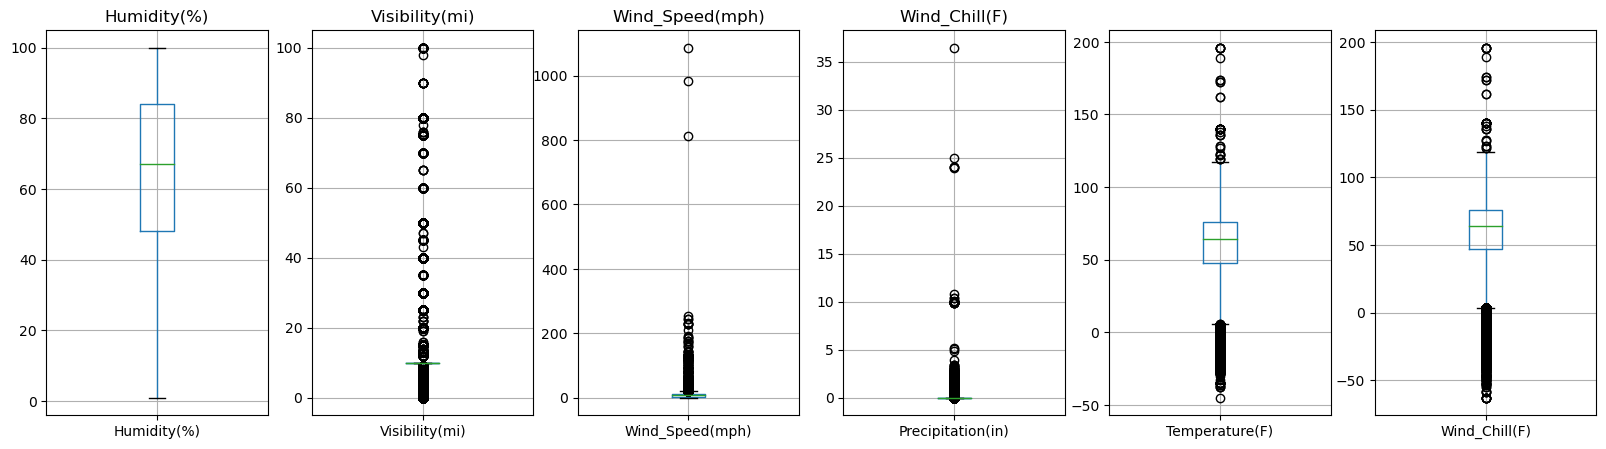

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

newdf[['Humidity(%)']].boxplot(ax=axes[0])
axes[0].set_title('Humidity(%)')

newdf[['Visibility(mi)']].boxplot(ax=axes[1])
axes[1].set_title('Visibility(mi)')

newdf[['Wind_Speed(mph)']].boxplot(ax=axes[2])
axes[2].set_title('Wind_Speed(mph)')

newdf[['Precipitation(in)']].boxplot(ax=axes[3])
axes[3].set_title('Precipitation(in)')

newdf[['Temperature(F)']].boxplot(ax=axes[4])
axes[3].set_title('Temperature(F)')

newdf[['Wind_Chill(F)']].boxplot(ax=axes[5])
axes[3].set_title('Wind_Chill(F)')

plt.show()

as we can see, there are a lot of outliers in the dataset, we chose to keep a certain amount of them, and to delete the rest.

As we can see for example in the visibility plot, there is a huge amount of "10" values, so the other values are more rare, so we can decide to keep it this way or to delete them. We chose not to delete everyone of them.

In [15]:
#Visibility 
newdf.loc[newdf['Visibility(mi)'] > 60, 'Visibility(mi)'] = 60

#Wind speed
newdf = newdf[newdf['Wind_Speed(mph)'] <= 400]

#precipitaion
newdf = newdf[newdf['Precipitation(in)'] <= 7]

#Temperature
Q1= newdf['Temperature(F)'].quantile(0.25)
Q3= newdf['Temperature(F)'].quantile(0.75)
IQR = Q3 - Q1

max_limit = Q3 + (1.5 * IQR)
min_limit = Q1 - (1.5 * IQR)

newdf.loc[(df['Temperature(F)'] < min_limit), 'Temperature(F)'] = min_limit
newdf.loc[(df['Temperature(F)'] > max_limit), 'Temperature(F)'] = max_limit

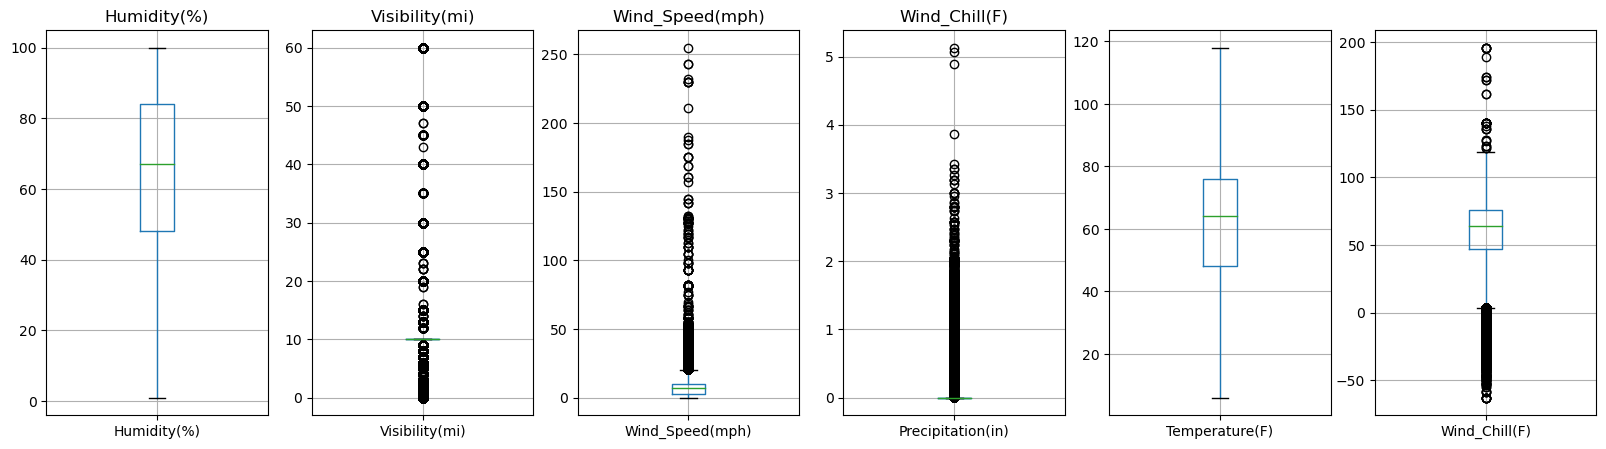

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

newdf[['Humidity(%)']].boxplot(ax=axes[0])
axes[0].set_title('Humidity(%)')

newdf[['Visibility(mi)']].boxplot(ax=axes[1])
axes[1].set_title('Visibility(mi)')

newdf[['Wind_Speed(mph)']].boxplot(ax=axes[2])
axes[2].set_title('Wind_Speed(mph)')

newdf[['Precipitation(in)']].boxplot(ax=axes[3])
axes[3].set_title('Precipitation(in)')

newdf[['Temperature(F)']].boxplot(ax=axes[4])
axes[3].set_title('Temperature(F)')

newdf[['Wind_Chill(F)']].boxplot(ax=axes[5])
axes[3].set_title('Wind_Chill(F)')

plt.show()

In [17]:
halfsize=int((newdf.shape[0])/80)
newdf = newdf.iloc[:halfsize,:]
print(newdf.shape)
newdf.reset_index(drop=True, inplace=True)

(65584, 33)


In [18]:
print(newdf['Precipitation(in)'])

0        0.03
1        0.02
2        0.02
3        0.02
4        0.01
         ... 
65579    0.00
65580    0.00
65581    0.00
65582    0.00
65583    0.00
Name: Precipitation(in), Length: 65584, dtype: float64


# Question 3

The variables we can predict are probably the severity of an accident, and maybe a start time.

Based on our intuition, we think that the most important variables to predict the severity of an accident would be the weather condition variables like Humidity, Wind Speed, Pressure, etc. And probably the time of the day like Day or Night.

## Univariate Analysis

Let's do a histogram

(array([16927.,     0.,     0., 25157.,     0.,     0., 23171.,     0.,
            0.,   329.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

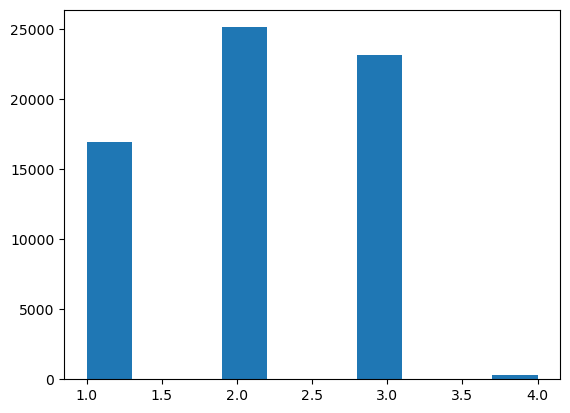

In [19]:
plt.hist(newdf['Severity'])

(array([50460.,     0.,     0.,     0.,     0., 14760.,     0.,     0.,
            0.,   364.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

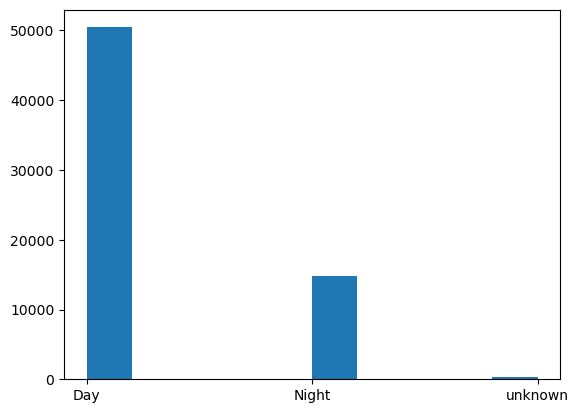

In [20]:
plt.hist(newdf['Sunrise_Sunset'])

(array([  192.,  1209.,  2256.,  3587.,  5660.,  7079.,  8292.,  9607.,
        14489., 13213.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

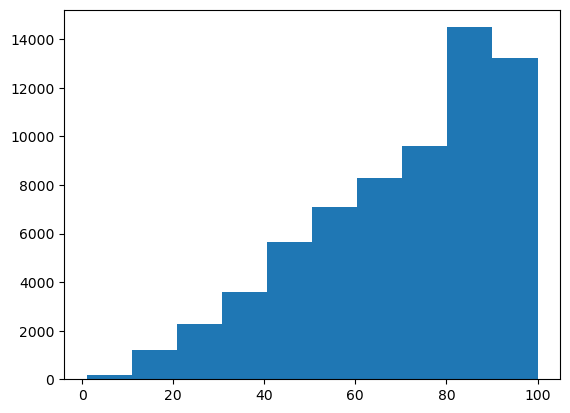

In [21]:
plt.hist(newdf['Humidity(%)'])

(array([2.7000e+01, 7.2500e+02, 9.4100e+02, 1.4690e+03, 6.0432e+04,
        1.9890e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([20.98 , 22.827, 24.674, 26.521, 28.368, 30.215, 32.062, 33.909,
        35.756, 37.603, 39.45 ]),
 <BarContainer object of 10 artists>)

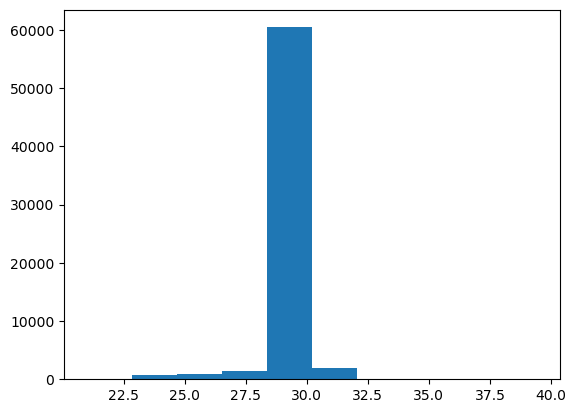

In [22]:
plt.hist(newdf['Pressure(in)'])

As we can see, in most case, there is high humidity, more, accidents with 0% humidity are very rare according to the histogram.
Most accidents happen with 7.5 mph, during the day, with a 30/35 in of pressure.

## Bivariate Analysis

Let's do some correlation matrices to understand which variables are the most impactful on the severity.

<Axes: >

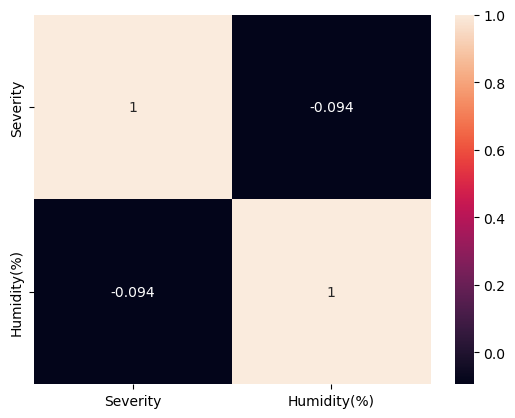

In [23]:
correl1 = newdf.loc[:, ['Severity', 'Humidity(%)']]
corr_matrix = correl1.corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: >

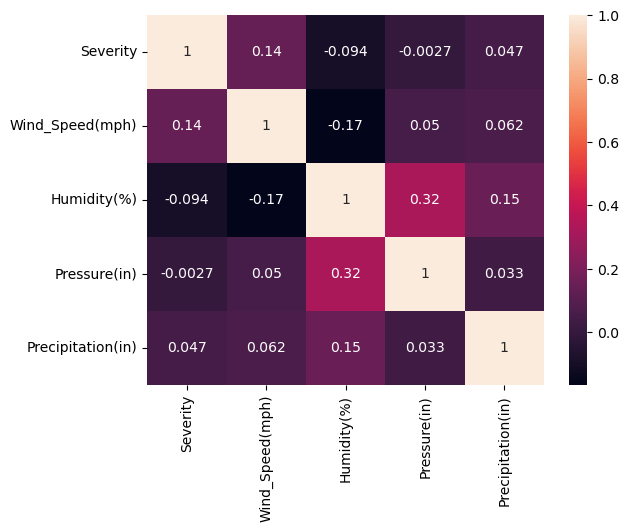

In [24]:
correl1 = newdf.loc[:, ['Severity', 'Wind_Speed(mph)','Humidity(%)','Pressure(in)', 'Precipitation(in)']]
corr_matrix = correl1.corr()
sns.heatmap(corr_matrix, annot=True)

So we can here see the correlation between the severity and the other chosen quantitative variable. The highest are the precipitation and the wind speed.

# Question 4

Here we are going to do a linear regression to predict values of new data for the dataset. 
Based on our intuition, we think that the most important variables to predict the severity of an accident would be the weather condition variables like Humidity or the time of the day like Day or Night, or even where it happened (what is on a stop, or a traffic sign ?)...


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
newdf.info() #We check again which colomns we have and their type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     65584 non-null  object 
 1   Source                 65584 non-null  object 
 2   Severity               65584 non-null  int64  
 3   Start_Time             65584 non-null  object 
 4   End_Time               65584 non-null  object 
 5   Start_Lat              65584 non-null  float64
 6   Start_Lng              65584 non-null  float64
 7   End_Lat                65584 non-null  float64
 8   End_Lng                65584 non-null  float64
 9   Distance(mi)           65584 non-null  float64
 10  State                  65584 non-null  object 
 11  Timezone               65584 non-null  object 
 12  Weather_Timestamp      65584 non-null  object 
 13  Temperature(F)         65584 non-null  float64
 14  Wind_Chill(F)          65584 non-null  float64
 15  Hu

In [63]:
# Define target variable and predictor variables
X = newdf[['Visibility(mi)','Weather_Condition','Wind_Speed(mph)','Traffic_Signal','State','Junction','Precipitation(in)','Crossing','Stop']] 
y = newdf['Severity']
#'Visibility(mi)','Crossing','Junction','Station','Traffic_Signal','Stop','Precipitation(in)'

After many test, to see which variables we should tale we decided to go with variable containing location informations (stop, state, traffic_signal...), variables linked to the condition (visibility, weather condition...).

In [64]:
# hot encoding on 'Weather_Condition' and 'State' columns as they are string colomns
X_encoded = pd.get_dummies(X, columns=['Weather_Condition','State'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [65]:
# Fit the linear regression model on the encoded data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

# Where a higher value indicates a better fit of the model to the data.

Training R^2 score: 0.24430378517137308
Testing R^2 score: 0.23833267491677146


We got a Training R^2 score of around 0.24. Knowing that the training R^2 score measures how well the model fits the training data. A high training R^2 score indicates that the model explains a large proportion of the variance in the training data. 

The testing R^2 score (here 0.23) measures how well the model generalizes to new, unseen data. This is crucial because the ultimate goal of a machine learning model is to make accurate predictions on new data. Here we have a lower testing score then a training score, while still behind close in value. Having a much higher testing score indicates overfitting.

Like we said earlier we tested the model with many differents variables to see which had the biggest impact on the dataset, and this is the combination that made us have the highest score for both the training and the testing score. Still, the number for both training and testing are very low (as it variates between 0 and 1). This may indicated us that the model is underfitting, meaning it's too simplistic. We can deduce that it's not explaining much of the variance in the data overall, this may be because there are so many variables, they don't have much significance overall on the dataset...

In [67]:
#Now we can get the coefficients
coefficients = model.coef_
intercept = model.intercept_

In [68]:
# Here we display all coefficients 
print("Intercept:", intercept)
for i, variable in enumerate(X_encoded.columns):
    print(f"Coefficient for {variable}: {coefficients[i]}")

Intercept: 0.7858510659522875
Coefficient for Visibility(mi): 0.00563461598739883
Coefficient for Wind_Speed(mph): 0.011419414099063385
Coefficient for Traffic_Signal: -0.4388715923874003
Coefficient for Junction: 0.2136958429676059
Coefficient for Precipitation(in): 0.07052177818004314
Coefficient for Crossing: -0.2564976970911512
Coefficient for Stop: -0.47666494761284406
Coefficient for Weather_Condition_Blowing Snow: -0.05733886212498754
Coefficient for Weather_Condition_Clear: 0.5905356810618243
Coefficient for Weather_Condition_Cloudy: 0.3409268245337671
Coefficient for Weather_Condition_Cloudy / Windy: 0.058918325274201135
Coefficient for Weather_Condition_Drizzle: 0.4165100744909022
Coefficient for Weather_Condition_Drizzle and Fog: -5.551115123125783e-16
Coefficient for Weather_Condition_Fair: 0.3020524443785456
Coefficient for Weather_Condition_Fair / Windy: 0.23525726704638145
Coefficient for Weather_Condition_Fog: 0.23739682850096644
Coefficient for Weather_Condition_Haze: 

Our intercept value is of 0.785 approximatly. This means when all of our independent variables are zero, the model predicts that the value of the Severity will be around 0.785. 

As we can see, there are so many variables, all of the coefficients are, in the end, very low. A coefficient close to zero suggests that the presence or absence of drifting snow as a weather condition has almost no impact on the Severity of accidents. 
As there are many coefficient, to see a little bit better we can display only the one that interest us by choosing value bigger then a number, like so :

In [69]:
# We display all coefficients with a high number = high impact on Severity
print("Intercept:", intercept)
for i, variable in enumerate(X_encoded.columns):
    if abs(coefficients[i]) > 0.5:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Intercept: 0.7858510659522875
Coefficient for Weather_Condition_Clear: 0.5905356810618243
Coefficient for Weather_Condition_Heavy Drizzle: 0.7897727839195118
Coefficient for Weather_Condition_Heavy Ice Pellets: 0.8452682572515026
Coefficient for Weather_Condition_Heavy Snow: 0.5848898982731168
Coefficient for Weather_Condition_Heavy T-Storm: 0.5733296900019393
Coefficient for Weather_Condition_Ice Pellets: 0.5563640764172214
Coefficient for Weather_Condition_Light Drizzle: 0.5692760425074791
Coefficient for Weather_Condition_Light Freezing Drizzle: 0.6918037843461378
Coefficient for Weather_Condition_Light Freezing Fog: 0.7883824216278252
Coefficient for Weather_Condition_Light Freezing Rain: 0.6822305973007201
Coefficient for Weather_Condition_Light Ice Pellets: 0.7831636625479942
Coefficient for Weather_Condition_Light Rain: 0.5462986605518995
Coefficient for Weather_Condition_Light Rain Shower: 0.6010872855451763
Coefficient for Weather_Condition_Light Rain Showers: 0.51644546369108

As we can see, some weather condition have a bigger impact on the Severity than others (Thunderstorms and Snow/rain) seems to be the highest. It is logical. Some state also harbor bigger coefficients than other like the WY State with a huge coefficient of 1.85. 
Now let's display low-impact coefficients

In [70]:
# We display all coefficient with a low number = low impact on Severity
for i, variable in enumerate(X_encoded.columns):
    if abs(coefficients[i]) < 0.1:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Coefficient for Visibility(mi): 0.00563461598739883
Coefficient for Wind_Speed(mph): 0.011419414099063385
Coefficient for Precipitation(in): 0.07052177818004314
Coefficient for Weather_Condition_Blowing Snow: -0.05733886212498754
Coefficient for Weather_Condition_Cloudy / Windy: 0.058918325274201135
Coefficient for Weather_Condition_Drizzle and Fog: -5.551115123125783e-16
Coefficient for Weather_Condition_Heavy Thunderstorms and Snow: 2.8754776337791554e-14
Coefficient for Weather_Condition_Light Snow / Windy: 5.1209037010835345e-15
Coefficient for Weather_Condition_Patches of Fog: 0.003058866953221
Coefficient for State_AR: -0.06049380844892477
Coefficient for State_AZ: -0.08455565418369888
Coefficient for State_CA: -0.06510107394427136
Coefficient for State_ID: -1.0436096431476471e-14
Coefficient for State_IL: 0.05259951620737821
Coefficient for State_KY: 0.04266633940230046
Coefficient for State_MD: 0.09819844729170737
Coefficient for State_MI: -0.06036464707973212
Coefficient for S

The results are a bit surprising as we could think Visibility(mi), Wind_Speed(mph) or Precipitation(in)could have a bigger impact on the Severity, however it is not the case. A lot of weather condition also have a low impact, but this could be because there is not enought data with all these types of weather. As we can see above, weather does have an impact on the severity. 
We would have also though that Crossing, Junction and Station had bigger coefficient overall. 

It could be interesting to see which coefficients have a medium impact (between 0.1 and 0.5).

In [71]:
# We display all coefficient with a medium number = mldium impact on Severity
for i, variable in enumerate(X_encoded.columns):
    if 0.1 <= abs(coefficients[i]) <= 0.5:
        print(f"Coefficient for {variable}: {coefficients[i]}")

Coefficient for Traffic_Signal: -0.4388715923874003
Coefficient for Junction: 0.2136958429676059
Coefficient for Crossing: -0.2564976970911512
Coefficient for Stop: -0.47666494761284406
Coefficient for Weather_Condition_Cloudy: 0.3409268245337671
Coefficient for Weather_Condition_Drizzle: 0.4165100744909022
Coefficient for Weather_Condition_Fair: 0.3020524443785456
Coefficient for Weather_Condition_Fair / Windy: 0.23525726704638145
Coefficient for Weather_Condition_Fog: 0.23739682850096644
Coefficient for Weather_Condition_Haze: 0.45937701943580855
Coefficient for Weather_Condition_Heavy Freezing Rain: -0.135643957544651
Coefficient for Weather_Condition_Heavy Rain: 0.48413777482055076
Coefficient for Weather_Condition_Heavy Rain / Windy: 0.37291171962646685
Coefficient for Weather_Condition_Heavy T-Storm / Windy: 0.398852114334195
Coefficient for Weather_Condition_Heavy Thunderstorms and Rain: 0.24831798235163288
Coefficient for Weather_Condition_Light Rain / Windy: 0.3838538159167061

And here we can see all coefficients that have a medium impact on the data. We can find mostly Weather condition has there are so many of them, as well as state locations. The asb(stop) coefficient is very close to 0.1, which is kind of low. As well as for Crossing, junction and Station, we would have though Stop had a higher coefficient. 

# Question 5

For this part, make sure you have xgboost installed on your computer (this can be done by running 'pip install xgboost' 
or 'conda install xgboost' if you are using anaconda)

We are going to use XGBoost because XGBoost is known for its high performance in terms of accuracy and execution time. It uses an optimization algorithm that gradually improves models, leading to more accurate results.

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [87]:
X2 = newdf[['Visibility(mi)','Crossing','Junction','Station','Traffic_Signal','Precipitation(in)','Stop']] 
y2 = newdf['Severity']
y2 -= 1 #we do this because we need to start at 0.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [88]:
# Build XGBoost model
model2 = XGBClassifier()

# Train model
model2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [89]:
# Make predictions
y_pred2 = model2.predict(X_test2)

In [90]:
# Evaluate model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.47244034459098877


The result we obtained is quite good. An accuracy of0.47 shows that the model is making correct predictions for roughly 47.24% of the instances for our dataset. 
The model has demonstrated some ability to generalize and make predictions on unseen data. It's able to capture underlying patterns in the data to a reasonable extent.

# Question 6

For this part we are using the library shap. You can download it using pip install shap or conda install shap regarding of what you use.

In [41]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [42]:
explainer = shap.TreeExplainer(model2)

In [43]:
shap_values = explainer.shap_values(X_test2)
print(shap_values)

[array([[ 0.18425404, -0.04159364,  0.02561646, ..., -0.1526063 ,
        -0.02755278,  0.10186812],
       [-0.04721049, -0.03829586,  0.03592405, ..., -0.14123201,
        -0.01888932,  0.09463333],
       [ 0.0649893 , -0.04865692,  0.03277702, ..., -0.17250076,
        -0.02043068,  0.08021969],
       ...,
       [ 0.0649893 , -0.04865692,  0.03277702, ..., -0.17250076,
        -0.02043068,  0.08021969],
       [ 0.10669836, -0.05992934,  0.01913013, ...,  0.6281742 ,
        -0.00852731,  0.06568414],
       [ 0.0649893 , -0.04865692,  0.03277702, ..., -0.17250076,
        -0.02043068,  0.08021969]], dtype=float32), array([[ 0.06300338, -0.00935204, -0.00288708, ..., -0.05619471,
        -0.00215699,  0.00127726],
       [ 0.21143126, -0.02240881, -0.002523  , ..., -0.05729874,
        -0.00367447, -0.01681542],
       [-0.07992086,  0.00138898, -0.00380509, ..., -0.04616064,
        -0.00372486, -0.00936502],
       ...,
       [-0.07992086,  0.00138898, -0.00380509, ..., -0.046

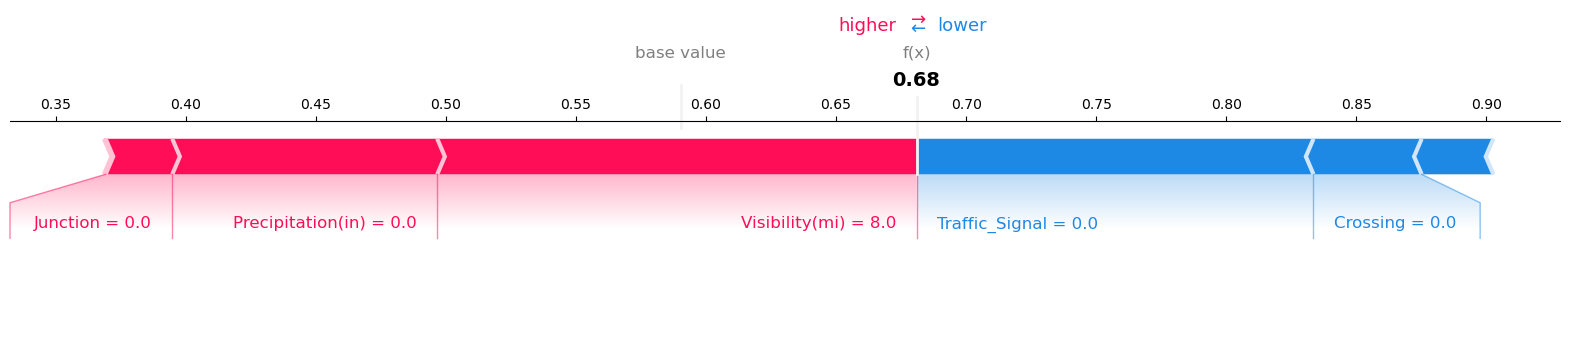

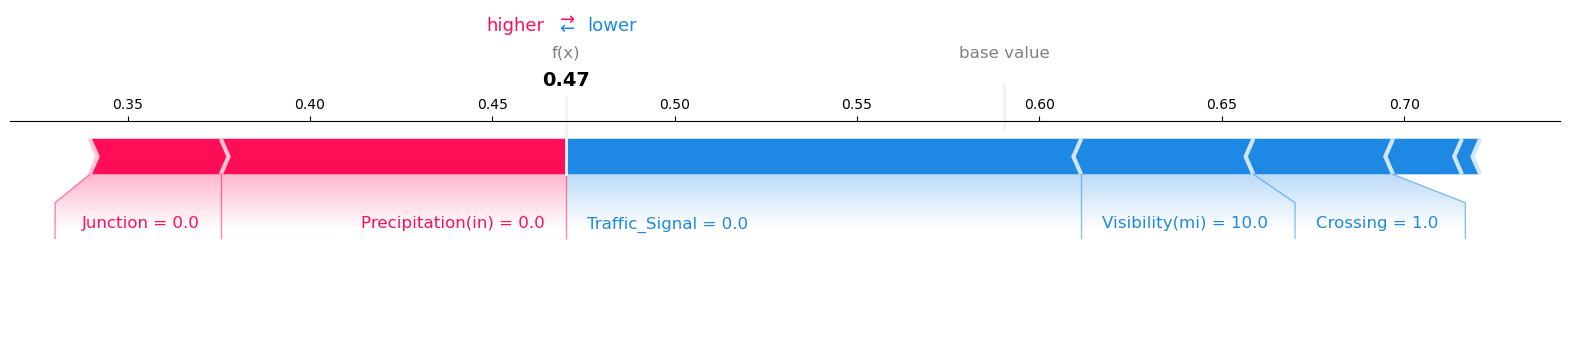

In [44]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test2.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value[0], shap_values[0][1,:], X_test2.iloc[1041,:], matplotlib=True)

The two graphs just above are showing the impact of the variables on one instance of our dataset. Here, the first one and a random other one. In the graph below, we will have a better view of the variable's impact on every instance.

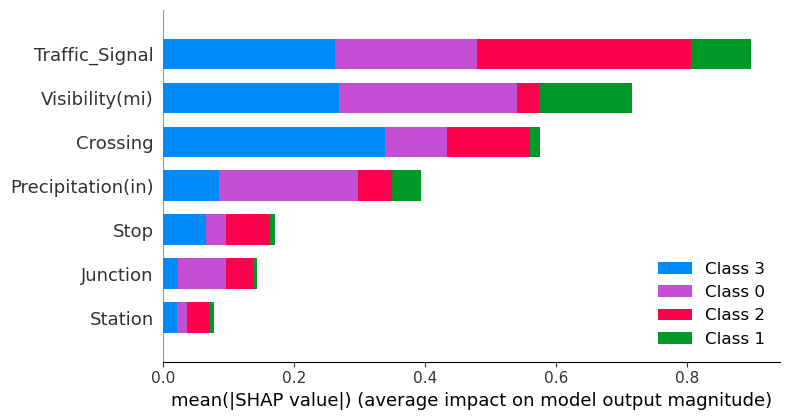

In [45]:
shap.summary_plot(shap_values, X_test2, plot_type="bar")

Here, we can see that the precipitation will have a great impact on every severity, and especially for the most severe accident (class 3). And for the number of traffic signals, we see that it has a big impact on the light accident (class 1 and class 2).

Compared to the linear regression, it comforts us with the choice of Precipitation influencing the severity. But, we had a coefficient of -0.12 for the traffic signals, and here we can see that it has a certain impact on the severity of an accident. It's the same thing for the variables Crossing and Visiblity that didn't have much impact on the linear regression. 

Let's do the beeswarms plot, with a dataframe with the most important variables

In [46]:
important_variables = X_test2[['Precipitation(in)', 'Traffic_Signal', 'Crossing', 'Visibility(mi)']].copy()

# Ajout de la variable Severity
important_variables['Severity'] = y_test2.copy()

In [47]:
#plt.figure(figsize=(10, 6))

# Precipitation
sns.swarmplot(data=important_variables, x='Severity', y='Precipitation(in)', size=3, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Precipitation(in)')
plt.title('Beeswarm Plot of Precipitation')
plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000028047510900> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Traffic Signals
sns.swarmplot(x='Severity', y='Traffic_Signals', data=important_variables, size=2, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Number of traffic signals')
plt.title('Beeswarm Plot for traffic signals')
plt.show()

In [ ]:
# Crossing
sns.swarmplot(x='Severity', y='Crossing', data=important_variables, size=3, hue='Severity', palette='Set1')
plt.xlabel('Severity')
plt.ylabel('Number of Crossing')
plt.title('Beeswarm Plot for Crossings')
plt.show()

# Question 7

In [92]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [93]:
shapley_values_array = np.array(shap_values)

# Reshape the array if necessary
shapley_values_2d = shapley_values_array.reshape(shapley_values_array.shape[0], -1)

# Perform PCA
pca = PCA(n_components=2)
shapley_pca = pca.fit_transform(shapley_values_2d)

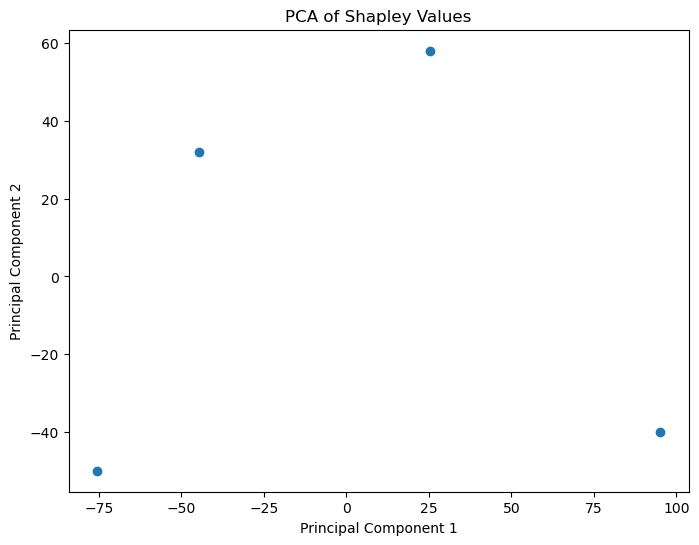

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(shapley_pca[:, 0], shapley_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Shapley Values')
plt.show()

In [100]:
# Perform K-Means clustering on the PCA values
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(shapley_pca)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


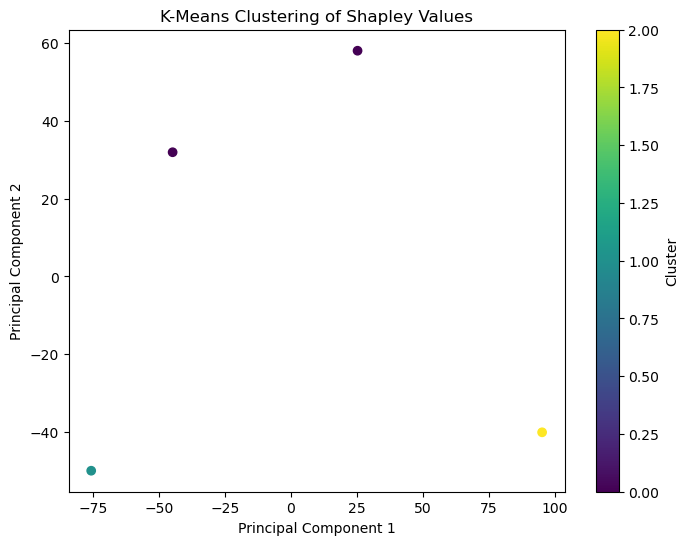

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(shapley_pca[:, 0], shapley_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Shapley Values')
plt.colorbar(label='Cluster')
plt.show()

We have very few dots... maybe our dataset isn't appropriate for such method. Let's try another method for cluster to see if it's indeed out dataset the potential issue : 

In [102]:
# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(shapley_values_2d)

Text(0, 0.5, 'Principal Component 2')

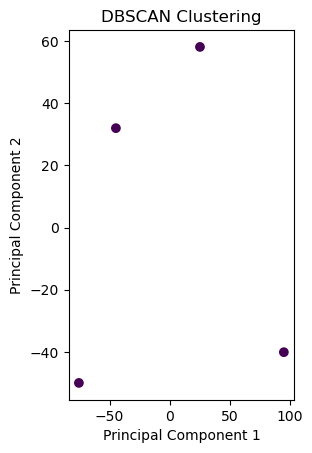

In [103]:
plt.subplot(1, 2, 2)
plt.scatter(shapley_pca[:, 0], shapley_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')